Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/489 [00:00<?, ? examples/s]

Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/141 [00:00<?, ? examples/s]

{'dataloader_num_workers': 1, 'eval_strategy': 'epoch', 'fp16': True, 'gradient_accumulation_steps': 2, 'greater_is_better': True, 'learning_rate': 2e-05, 'load_best_model_at_end': True, 'logging_steps': 50, 'logging_strategy': 'steps', 'lr_scheduler_type': 'linear', 'max_grad_norm': 1.0, 'metric_for_best_model': 'eval_f1_macro', 'num_train_epochs': 15, 'output_dir': './mbert_sentiment', 'per_device_eval_batch_size': 32, 'per_device_train_batch_size': 8, 'save_strategy': 'epoch', 'seed': 42, 'warmup_ratio': 0.06, 'weight_decay': 0.01}
[OPTIMIZER] epoch_start=0 global_step=0 wrapped=AcceleratedOptimizer base=AdamW lr=0.0 id=134152138143648 hyperparams={'lr': 0.0, 'betas': (0.9, 0.999), 'eps': 1e-06, 'weight_decay': 0.01, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'decoupled_weight_decay': True, 'initial_lr': 2e-05}
[OPTIMIZER_GROUP]   group[0] {'lr': 0.0, 'betas': (0.9, 0.999), 'eps': 1e-06, 'weight_decay': 0.01, 'a

[TRAINING_PERFORMANCE] epoch=1.0 tokens=0 time=5.89s tok/s=0.0 ex/s=0.00 peak_mem=3.33GiB lr=2.00e-05
[EVALUATION_PERFORMANCE] tokens=24576 time=0.11s tok/s=224392.7 ex/s=1753.07
[EVALUATION_PERFORMANCE] accuracy=0.5429 cost=$0.00 accuracy_per_$=154.55
[OPTIMIZER] epoch_start=1.0 global_step=31 wrapped=AcceleratedOptimizer base=AdamW lr=1.9954233409610984e-05 id=134152138143648 hyperparams={'lr': 1.9954233409610984e-05, 'betas': (0.9, 0.999), 'eps': 1e-06, 'weight_decay': 0.01, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'decoupled_weight_decay': True, 'initial_lr': 2e-05}
[OPTIMIZER_GROUP]   group[0] {'lr': 1.9954233409610984e-05, 'betas': (0.9, 0.999), 'eps': 1e-06, 'weight_decay': 0.01, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'decoupled_weight_decay': True, 'initial_lr': 2e-05}
[SCHEDULER]   scheduler_last_lr=[1.9954233409610984e-05]
[PARA

[EVALUATION_PERFORMANCE] tokens=40960 time=0.16s tok/s=255120.0 ex/s=1993.12
[EVALUATION_PERFORMANCE] accuracy=0.8085 cost=$0.19 accuracy_per_$=4.21

### BERT-BASE-MULTILINGUAL-CASED EVALUATION METRICS ###
{'epoch': 15.0,
 'eval_accuracy': 0.8085106382978723,
 'eval_f1_macro': 0.7944068001064856,
 'eval_loss': 0.971534252166748,
 'eval_mse': 0.060161447325589694,
 'eval_precision_macro': 0.8013618851949685,
 'eval_recall_macro': 0.79335232668566,
 'eval_runtime': 0.2167,
 'eval_samples_per_second': 650.681,
 'eval_sse': 8.482764072908147,
 'eval_steps_per_second': 23.074}


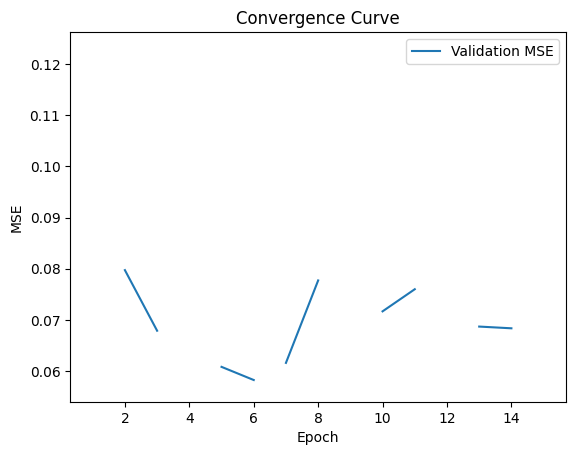

Saving the dataset (0/1 shards):   0%|          | 0/70 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/489 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/141 [00:00<?, ? examples/s]

In [1]:
# Generic: A Modular Multi-Pipeline Framework for Probability Fusion Ensembles
# Specific: Cross-Lingual Sentiment Analysis with Probability Fusion Ensembles: A Modular Multi-Pipeline Framework for Low-Resource Languages

import os
import pandas as pd
import pprint

from pathlib import Path
from transformers import pipeline

from src.config import *
from src.metrics import evaluate_pipe
from src import (
    context,
    helper,
    sentiment, 
    utility, 
)

os.environ["HF_DATASETS_DISABLE_CACHING"] = "1"
os.environ["TOKENIZERS_PARALLELISM"] = "false"
helper.list_config()

if App.HAS_GPU:
    os.environ["MAMBA_USE_MAMBAPY"] = Mamba.FORCE_CUDA
    os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

if App.ACTION == "INFER":
    sample_texts = [
        "Maganda ang serbisyo at mabilis ang delivery!",
        "Masama ang pakiramdam ko.",
        "Hindi ito madali.",
        "Sakto lang.",
        "Sobrang pangit ng karanasan ko.",
        "Hindi ito maganda",
        "It was okay, nothing special.",
    ]
    sentiment.infer(sample_texts, MBert)
elif App.ACTION == "ENSEMBLE":
        temps  = [1.1, 0.9]
        weights = [0.4, 0.6]
        ens = sentiment.ensemble([MBert, Mamba], temps, weights)
        print(ens)
elif App.ACTION == "TRAIN":
    mbert_context = context.setup_pipeline(MBert, require_translation = False)
    mbert_trainer = sentiment.train(mbert_context)

    #xlmr_context = context.setup_pipeline(Xlmr, require_translation = False)
    #xlmr_trainer = sentiment.train(xlmr_context)
    
    #mamba_context = context.setup_pipeline(Mamba, require_translation = True)
    #mamba_trainer = sentiment.train(mamba_context)
else:
    raise ValueError("Invalid action.")

